In [19]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os
os.chdir('/Users/Lenovo/Desktop/EBAC')

In [3]:
data = pd.read_csv('recursos_humanos.csv')
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [5]:
data = pd.get_dummies(data, columns = ['sales'], prefix = 'Info_Sales', dtype=int)

In [7]:
data = pd.get_dummies(data, columns = ['salary'], prefix = 'Info_Salary', dtype = int)

In [9]:
y = data.left.values
x_data = data.drop(['left'], axis = 1)

In [11]:
# Pre-Procesamiento de datos y seleccion
data.dtypes

satisfaction_level        float64
last_evaluation           float64
number_project              int64
average_montly_hours        int64
time_spend_company          int64
Work_accident               int64
left                        int64
promotion_last_5years       int64
Info_Sales_IT               int32
Info_Sales_RandD            int32
Info_Sales_accounting       int32
Info_Sales_hr               int32
Info_Sales_management       int32
Info_Sales_marketing        int32
Info_Sales_product_mng      int32
Info_Sales_sales            int32
Info_Sales_support          int32
Info_Sales_technical        int32
Info_Salary_high            int32
Info_Salary_low             int32
Info_Salary_medium          int32
dtype: object

In [13]:
feature_df = data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'Info_Sales_IT', 'Info_Sales_RandD', 'Info_Sales_accounting', 'Info_Sales_hr', 'Info_Sales_management', 'Info_Sales_marketing', 'Info_Sales_product_mng', 'Info_Sales_sales', 'Info_Sales_support', 'Info_Sales_technical', 'Info_Salary_high', 'Info_Salary_low', 'Info_Salary_medium']]
X = np.asarray(feature_df)
X

array([[0.38, 0.53, 2.  , ..., 0.  , 1.  , 0.  ],
       [0.8 , 0.86, 5.  , ..., 0.  , 0.  , 1.  ],
       [0.11, 0.88, 7.  , ..., 0.  , 0.  , 1.  ],
       ...,
       [0.37, 0.53, 2.  , ..., 0.  , 1.  , 0.  ],
       [0.11, 0.96, 6.  , ..., 0.  , 1.  , 0.  ],
       [0.37, 0.52, 2.  , ..., 0.  , 1.  , 0.  ]])

In [15]:
data['left'] = data['left'].astype('int')
y = np.asarray(data['left'])
y[0:5]

array([1, 1, 1, 1, 1])

In [21]:
# Creacion de grupos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)
print('Grupo de entrenamiento', X_train.shape, y_train.shape)
print('Grupo de prueba', X_test.shape, y_test.shape)

Grupo de entrenamiento (11999, 20) (11999,)
Grupo de prueba (3000, 20) (3000,)


# Modelo SVM RBF

In [24]:
from sklearn import svm
clf = svm.SVC(kernel = 'rbf')
clf.fit(X_train, y_train)

SVC()

In [26]:
# Prediccion para la base de prueba
yhat = clf.predict(X_test)
yhat[0:5]

array([0, 0, 0, 0, 0])

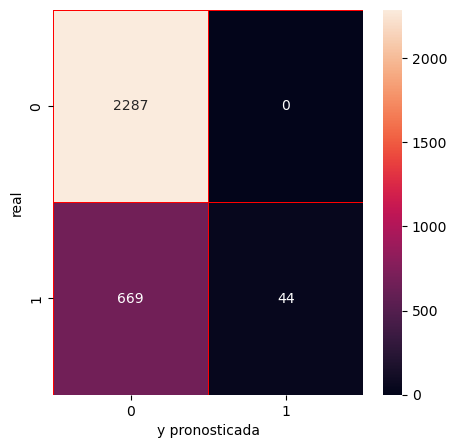

In [30]:
# Visualizacion de la matriz de confusion
import seaborn as sns
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X)
cm = confusion_matrix(y_test, yhat)
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm, annot = True, linewidths = 0.5, linecolor = 'red', fmt = '.0f', ax = ax)
plt.xlabel('y pronosticada')
plt.ylabel('real')
plt.show()

In [32]:
# Estadisticas de desempeno
from sklearn.metrics import classification_report
cnf_matrix = confusion_matrix(y_test, yhat, labels = [0,1])
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      2287
           1       1.00      0.06      0.12       713

    accuracy                           0.78      3000
   macro avg       0.89      0.53      0.49      3000
weighted avg       0.83      0.78      0.69      3000



# Interpretacion RBF
Precision: Para el caso de los valores pronosticados como que el empleado dejaria la compañia, tenemos un 100% de precision, en el caso de los que estimamos que no lo dejaria tenemos una precision del 77% por lo que tenemos un 23% de error en este caso.
Recall: Para los casos en donde realmente el personal se quedo en la compañia tenemos un 100% de efectividad ya que no se pronosticaron casos que se irian, al contrario, cuando realmente si dejaron la comapia tenemos un 6% de efectividad, ya que los casos correctos incorrectos pronosticados fueron muy altos.
F1 Score: En el caso donde no se dejo la compañia el resultado es favorable ya que llegamos a un 87% al contrario de cuando se dejo la compañia solo llegamos al 12%
Acuracy: En este modelo contamos con una precision global del 78%

# Modelo SVM Lineal

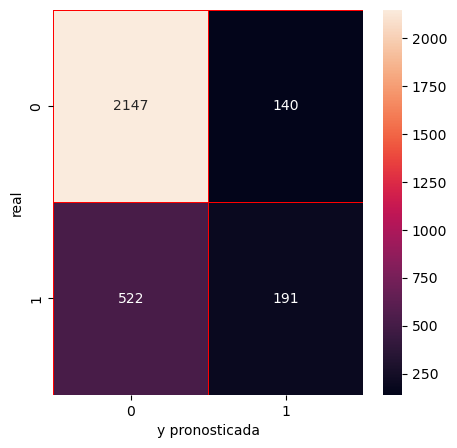

In [36]:
clf = svm.SVC(kernel = 'linear')
clf.fit(X_train, y_train)

yhat = clf.predict(X_test)

# confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X)
cm = confusion_matrix(y_test, yhat)
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm, annot = True, linewidths = 0.5, linecolor = 'red', fmt = '.0f', ax = ax)
plt.xlabel('y pronosticada')
plt.ylabel('real')
plt.show()

In [38]:
# Estadisticas de desempeno
from sklearn.metrics import classification_report
cnf_matrix = confusion_matrix(y_test, yhat, labels = [0,1])
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.80      0.94      0.87      2287
           1       0.58      0.27      0.37       713

    accuracy                           0.78      3000
   macro avg       0.69      0.60      0.62      3000
weighted avg       0.75      0.78      0.75      3000



# Interpretacion Lineal
Precision: Para el caso de los valores pronosticados como que el empleado dejaria la compañia, tenemos un 58% de precision, en el caso de los que estimamos que no lo dejaria tenemos una precision del 80%.
Recall: Para los casos en donde realmente el personal se quedo en la compañia tenemos un 94% de efectividad ya que se pronosticaron pocos casos que se irian, al contrario, cuando realmente si dejaron la comapia tenemos un 27% de efectividad, ya que los casos correctos incorrectos pronosticados fueron muy altos, encontrando el modelo un poco mas balanceado.
F1 Score: En el caso donde no se dejo la compañia el resultado es favorable ya que llegamos a un 87% al contrario de cuando se dejo la compañia solo llegamos al 37%
Acuracy: En este modelo contamos con una precision global del 78%

# Modelo SVM Polinomial

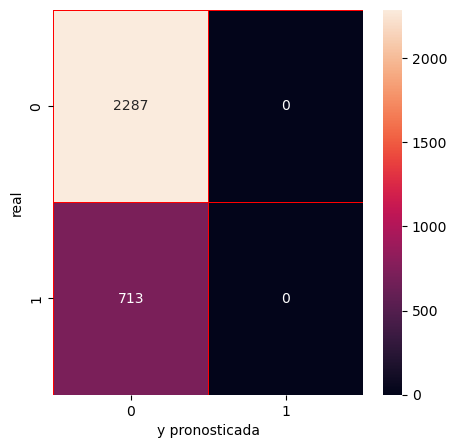

In [41]:
clf = svm.SVC(kernel = 'poly')
clf.fit(X_train, y_train)

yhat = clf.predict(X_test)

# confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X)
cm = confusion_matrix(y_test, yhat)
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm, annot = True, linewidths = 0.5, linecolor = 'red', fmt = '.0f', ax = ax)
plt.xlabel('y pronosticada')
plt.ylabel('real')
plt.show()

In [43]:
# Estadisticas de desempeno
from sklearn.metrics import classification_report
cnf_matrix = confusion_matrix(y_test, yhat, labels = [0,1])
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.76      1.00      0.87      2287
           1       0.00      0.00      0.00       713

    accuracy                           0.76      3000
   macro avg       0.38      0.50      0.43      3000
weighted avg       0.58      0.76      0.66      3000



# Interpretacion RBF
Precision: Para el caso de los valores pronosticados como que el empleado dejaria la compañia, tenemos un 76% de precision, en el caso de los que estimamos que no lo dejaria tenemos una precision del 0% por lo que este modelo no estimo ninguna salida.
Recall: Para los casos en donde realmente el personal se quedo en la compañia tenemos un 100% de efectividad ya que no se pronosticaron casos que se irian, al contrario, cuando realmente si dejaron la comapia tenemos un 0% de efectividad, de nuevo no estimo ninguna salida.
F1 Score: En el caso donde no se dejo la compañia el resultado es favorable ya que llegamos a un 87% al contrario de cuando se dejo la compañia no se hizo ninguna estimacion
Acuracy: En este modelo contamos con una precision global del 76%
EN este caso encontramos un modelo mas desbalanceado, en donde no tenemos ninguna estimacion de renuncia.

# Modelo SVM Sigmoide

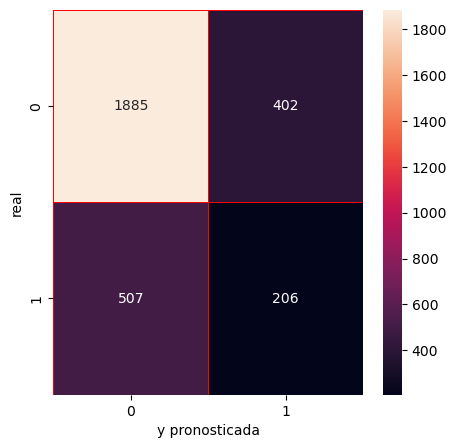

In [48]:
clf = svm.SVC(kernel = 'sigmoid')
clf.fit(X_train, y_train)

yhat = clf.predict(X_test)

# confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X)
cm = confusion_matrix(y_test, yhat)
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm, annot = True, linewidths = 0.5, linecolor = 'red', fmt = '.0f', ax = ax)
plt.xlabel('y pronosticada')
plt.ylabel('real')
plt.show()

In [50]:
# Estadisticas de desempeno
from sklearn.metrics import classification_report
cnf_matrix = confusion_matrix(y_test, yhat, labels = [0,1])
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81      2287
           1       0.34      0.29      0.31       713

    accuracy                           0.70      3000
   macro avg       0.56      0.56      0.56      3000
weighted avg       0.68      0.70      0.69      3000



# Interpretacion RBF
Precision: Para el caso de los valores pronosticados como que el empleado dejaria la compañia, tenemos un 34% de precision, en el caso de los que estimamos que no lo dejaria tenemos una precision del 79%.
Recall: Para los casos en donde realmente el personal se quedo en la compañia tenemos un 82% de efectividad ya que se pronosticaron casos que se irian, al contrario, cuando realmente si dejaron la comapia tenemos un 29% de efectividad, ya que los casos correctos incorrectos pronosticados fueron muy altos.
F1 Score: En el caso donde no se dejo la compañia el resultado es favorable ya que llegamos a un 81% al contrario de cuando se dejo la compañia solo llegamos al 31%
Acuracy: En este modelo contamos con una precision global del 78%, siendo el modelo mas bajo en cuento a la acertividad.

# Modelo predictivo mas adecuado
En este caso pudieramos quedarnos con el RBF o el Lineal ya que los dos tinen una acertividad global alta en comparacion a los otros 2, en est caso, el lineal lo veo un poco mas balanceado.

# Evaluacion

In [72]:
X_eva = pd.DataFrame({
    'satisfaction_level': [0.5],
    'last_evaluation': [0.75],
    'number_project': [4],
    'average_montly_hours': [200],
    'time_spend_company': [4],
    'work_accident': [0],
    'promotion_last_5years': [0],
    'Info_Sales_IT': [0],
    'Info_Sales_RandD': [0],
    'Info_Sales_accounting': [0],
    'Info_Sales_hr': [0],
    'Info_Sales_management': [0],
    'Info_Sales_marketing': [0],
    'Info_Sales_product_mng': [0],
    'Info_Sales_sales': [1],
    'Info_Sales_support': [0],
    'Info_Sales_technical': [0],
    'Info_Salary_high': [0],
    'Info_Salary_low': [0],
    'Info_Salary_medium': [1]
})

In [76]:
clf = svm.SVC(kernel = 'linear')
clf.fit(X_train, y_train)

yhat = clf.predict(X_eva)

yhat

array([0])

# Resultado
De acuerdo a nuestro modelo y a la informacion anterior, determinamos que este empleado no dejara la compañia.